# DATA SCIENCE PRINCIPLES (ITS65704)

# Assignment Details:
* Assignment Title: Case Study Based Assessment 
* Assignment Weightage: 50%
* Due Date: 05/12/2020 by 08:00AM to TIMES
* Assignment Type: Final Assessment

NAME: Neo Ann Yi

STUDENT ID: 0340281

PROGRAMME: Bachelor of Computer Science

SCHOOL: SOCIT

In [1]:
# import commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Frame the Problem

For this assignment project, the client is a cardiologist that specialises in analysing the characteristics and variations of heart disease. She wants to obtain an accurate classification model to help local doctors and nurses to classify the presence of heart disease in their patients, but does not possess any data science background or knowledge on proper data collection and data analysis techniques. As a start, she collected 303 samples on 13 specific health-related factors for 303 patients, following the Heart Disease Data Set that was uploaded to the UCI Machine Learning Repository in July 1988. 

Cardiovascular diseases (CVDs) are found to be the primary cause of death on a global scale, taking
up close to 13% of all deaths (WHO, 2020). The six main types of heart disease include coronary heart disease (CAD), myocardial infarction or more commonly known as heart attacks, congestive heart failure, heart valve disease, cardiomyopathy or heart muscle disease, and arrhythmia or more commonly described as abnormal heart rhythms. The common symptoms are chest pains, shortness of breath, and weakness in the body (WHO, 2020).

These features differ for individual patients, which is a significant problem faced during the diagnosis process, and further emphasises the importance of accurate classifications for cardiologists and patients alike. The implications of a wrong classification, for instance a false negative (FN) for a patient misdiagnosed as not having heart disease, will cause the patient to lose out on immediate treatment and medications and may lead to death if the mistake is discovered too late. On the other hand, a false positive (FP) for a patient misdiagnosed as having heart disease, will cause the patient to be subjected to unneeded treatments and medications which may lead to other health problems.

The purpose of this assignment project is to design, develop, evaluate, and deploy an accurate classification model to help predict the presence of heart disease. The primary focus is on 13 health-related factors as the predictors to assess and distinguish the presence of heart disease. 

This assignment will extract relevant, representative, and sufficient case study data from a given reputable and reliable source. Appropriate data preprocessing adjustments and data exploration techniques will be performed on the dataset to ensure reliable model outcomes and outputs. For the data mining and modelling process, the popular classifier models of k-Nearest Neighbours, Decision Tree, and Naive Bayes will be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall, and F1-score, in predicting the classifications of the presence heart disease. All significant interpretations and observations will be noted and considered for future improvements.

Conclusion : 

The main problem to be solved by the data science task must be properly framed, in terms of client's goals, background information, and purpose of task. This allows the data science task to be understood and explored to better inform the decision-making process. The more appropriate approaches and solutions to the problem can then be chosen from the wide range of possibilities.

The client is a cardiologist, and her goal is to obtain a classification model on predicting the presence of heart disease in patients. The problem is that she does not have any experience in data science or in constructing machine learning models, and the background information emphasises that without accurate and reliable classifications, misdiagnosis will endanger the health of patients and may even lead to unnecessary death. The aim of this assignment project is to design, develop, evaluate, and deploy an accurate classification model to help predict the presence of heart disease.

### Load the Data

In [2]:
# Load data from Excel csv sheet
df = pd.read_csv(r'C:\Users\user\Downloads\ITS65704 Data Science Principles\heart.csv', sep = ',')
print(df)
# show 10 out of 303 records for 13 attributes and 1 target class

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
# return the object type, which is dataframe
type(df)

# dataframes allow a wider variety of methods for data analysis

pandas.core.frame.DataFrame

Conclusion : 

The Heart Disease dataset is collected from a given reputable and reliable data source, similar to the Heart Disease Data Set that was uploaded to the UCI Machine Learning Repository in July 1988. 

The data are organised in a dataframe format type, which will allow the use of a wider variety of syntax and methods for future data analysis, including describe() and info().

The dataset contains 303 rows/records and 14 columns/attributes, consisting of 13 independent numerical attributes as the predictors, and 1 target class label. The dataset contains labelled data.

For discrete quantitative integer data type, the attribute 'age' is the age of patient in years. 'trestbps' is the resting blood pressure in milligrams of mercury (mm Hg) upon hospital admission. 'chol' is the serum cholesterol in milligrams per decilitre (mg/dl). 'thalach' is the maximum heart rate achieved in beats per minute (BPM). 

For discrete quantitative asymmetric binary data type, 'sex' is the gender of the patient where 1 represents male and 0 represents female. For symmetric binary data type, 'fbs' is the fasting blood sugar where 1 represents more than 120 mg/dl and 0 represents less than that. 'exang' is the presence of exercise-induced angina where 1 represents presence and 0 represents absence.

For quantitative categorical data type, 'cp' is the type of chest pain where 0 represents typical angina, 1 represents atypical angina, 2 represents non-angina pain, and 3 represents asymptomatic. 'restecg' is the resting electrocardiographic results where 0 represents normal, 1 represents abnormalities, and 2 represents probable or definite left ventricular hypertrophy. 'slope' represents the slope of peak exercise segment where 0 represents upsloping, 1 represents flat, and 2 represents downsloping. 'ca' is the number of major heart vessels coloured by flourosopy. 'thal' of 1 represents normal, 2 represents fixed defect, and 3 represents reversable defect.  

'oldpeak' is the depression induced by exercise relative to rest, and has a quantitative continuous float data type limited to one decimal place.

The dataset has 2 classes of presence of heart disease. The data type is quantitative asymmetric discrete binary values where 1 represents presence and 0 represents absence of heart disease. 

### Data Preprocessing

In [4]:
# detect duplicated records
df[df.duplicated(subset=None, keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
# drop the duplicated records, retain only one copy for each
df = pd.DataFrame.drop_duplicates(df)
df = df.reset_index(drop=True)
df.shape
# dropped 1 record

(302, 14)

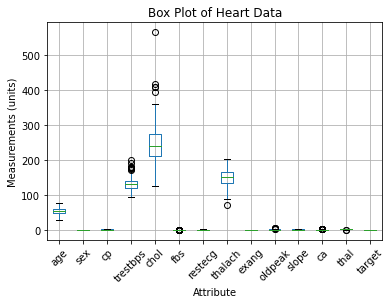

In [6]:
# identify impossible values and outliers or infrequent factors using boxplots
df.boxplot(rot=0, showfliers=True, boxprops=dict(color='blue'))
plt.title("Box Plot of Heart Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (units)") # y axis label
plt.xticks(rotation=45)
plt.show()

# outliers identified for 7 out of 14 attributes

In [7]:
# for numerical attributes, smooth outliers using winsorization technique
# replace outlier with maximum or minimum non-outlier 
for a in ('trestbps','chol','thalach','oldpeak'): 
    
    # compute interquartile range (IQR)
    IQR = df[a].quantile(0.75) - df[a].quantile(0.25)

    # compute maximum and minimum non-outlier value
    minAllowed = df[a].quantile(0.25)-1.5*IQR
    maxAllowed = df[a].quantile(0.75)+1.5*IQR

    # replace outlier values
    for i in range(len(df[a])): 
        if df[a][i] < minAllowed:
           df[a] = df[a].replace(df[a][i], minAllowed)
        elif df[a][i] > maxAllowed:
           df[a] = df[a].replace(df[a][i], maxAllowed)
        else: continue

In [8]:
# for categorical attributes, re-level infrequent factors for 'ca' and impossible value of 'thal' of 0 by 
    # replacing with their respective mode value
# re-level factors that take up less than 5% of total records, since results generated 
    # based on too small sample sizes are often not representative (Rocchi, 2014) 
# ignore 'fbs' since there are only 2 categories
import statistics
for a in ('ca', 'thal'):
    # compute interquartile range (IQR)
    IQR = df[a].quantile(0.75) - df[a].quantile(0.25)

    # compute maximum and minimum non-outlier value
    minAllowed = df[a].quantile(0.25)-1.5*IQR
    maxAllowed = df[a].quantile(0.75)+1.5*IQR

    # replace outlier values
    for i in range(len(df[a])): 
        if df[a][i] < minAllowed or df[a][i] > maxAllowed:
           df[a] = df[a].replace(df[a][i], statistics.mode(df[a]))
        else: continue

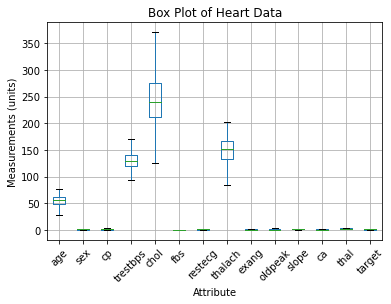

In [9]:
# confirm smoothed outliers using boxplot
df.boxplot(rot=0, showfliers=False, boxprops=dict(color='blue'))
plt.title("Box Plot of Heart Data") # title of plot
plt.suptitle("")
plt.xlabel("Attribute") # x axis label
plt.ylabel("Measurements (units)") # y axis label
plt.xticks(rotation=45)
plt.show()

In [10]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

# output :
# 1 target object class
# 3 attributes of continuous numerical data type with 64 digit placings
# 10 attributes of discrete numerical data type with 64 digit placings
# 302 records with no missing values
# memory space usage is 33.2kb

# no incomplete records or missing values identified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [11]:
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe() 

# some ranges are not appropriate and comparable, data transformation is needed for KNN modelling
    #for the attributes 'age', trestbps', 'chol', and 'thalach'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.466887,2.327815,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,0.708676,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


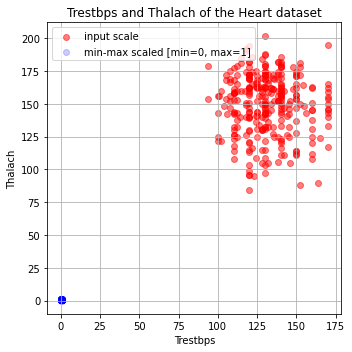

In [12]:
from sklearn import preprocessing

# min-max scaling for data transformation to within normalised range of [0, 1]
df_minmax = df
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(df_minmax)
df_minmax = minmax_scale.transform(df_minmax)

# sample plots of 2 out of 4 transformed attributes
def plot():
    plt.figure(figsize=(5,5))
    plt.scatter(df['trestbps'], df['thalach'], color='red', alpha=0.5, # original data points plotted in red
                label='input scale') # legend
    plt.scatter(df_minmax[:,3], df_minmax[:,7], color='blue', alpha=0.2, # scaled data points plotted in blue
                label='min-max scaled [min=0, max=1]') # legend
    plt.title('Trestbps and Thalach of the Heart dataset') # title of plot
    plt.xlabel('Trestbps') # x axis label
    plt.ylabel('Thalach') # y axis label
    plt.legend(loc='upper left') # position of legend
    plt.grid()
    plt.tight_layout()
plot()
plt.show();

In [13]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
corrMatrix = df.corr()

# only remove redundant attributes with high intercorrelations of above absolute value of 0.95
    # since chosen KNN, Decision Tree, and Naive Bayes models are immune to multicollinearity
# note that those above absolute value of 0.5 is considered highly correlated
cor_features = corrMatrix[:]
relevant_features = cor_features[abs(cor_features)<0.95]
relevant_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,NaN,-0.094962,-0.063107,0.290209,0.198901,0.119492,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.314349,0.063768,-0.221476
sex,-0.094962,NaN,-0.051740,-0.048559,-0.178446,0.046022,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.038406,0.213193,-0.283609
cp,-0.063107,-0.051740,NaN,0.055026,-0.089633,0.096018,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.185623,-0.167628,0.432080
trestbps,0.290209,-0.048559,0.055026,NaN,0.135429,0.169049,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.037995,0.049165,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,NaN,0.013221,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.073445,0.074410,-0.099932
fbs,0.119492,0.046022,0.096018,0.169049,0.013221,NaN,-0.083081,-0.008013,0.024729,0.010471,-0.058654,0.105015,-0.011995,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,-0.083081,NaN,0.043183,-0.068807,-0.059850,0.090402,-0.082304,-0.012146,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,-0.008013,0.043183,NaN,-0.381027,-0.349367,0.385844,-0.167296,-0.115430,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,0.024729,-0.068807,-0.381027,NaN,0.298094,-0.256106,0.177253,0.224510,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,0.010471,-0.059850,-0.349367,0.298094,NaN,-0.572578,0.214380,0.206816,-0.435099


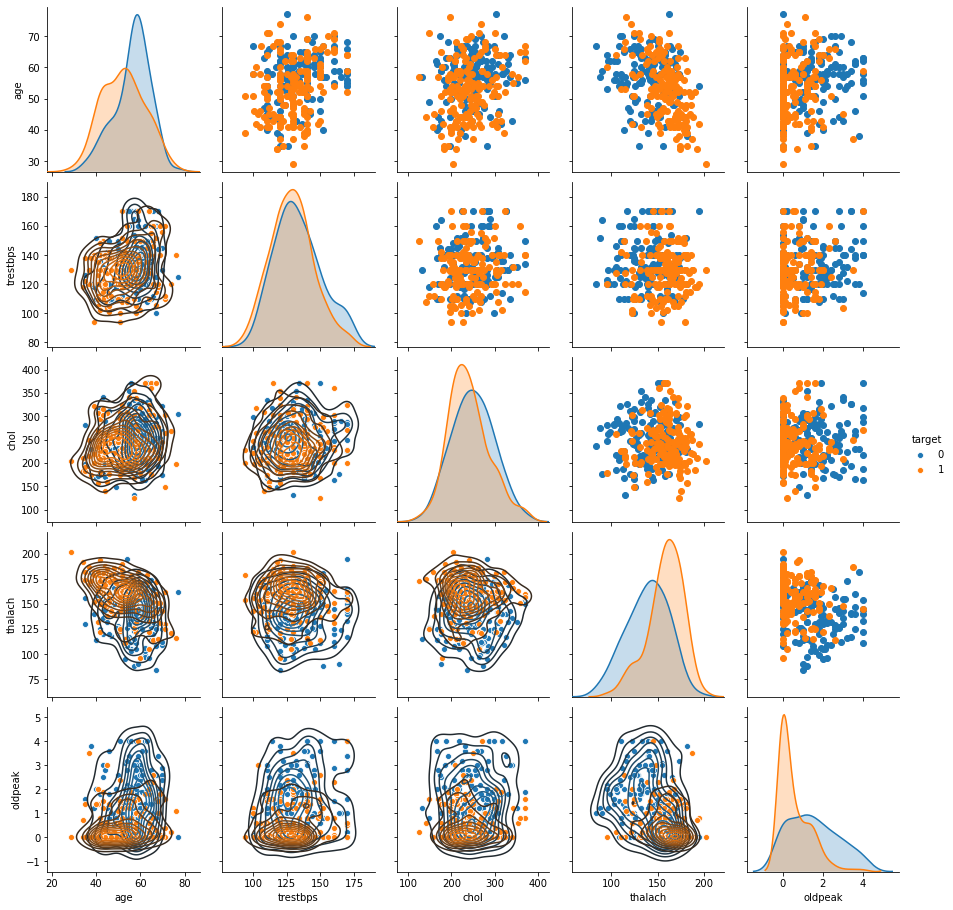

In [14]:
# import searborn library for more variety of data visualisation using fewer syntax and 
# interesting default themes
import seaborn as sns 

# visualise pairs plot or scatterplot matrix for numerical attributes in relation to target
g = sns.pairplot(df, vars=['age','trestbps','chol','thalach','oldpeak'], hue = 'target')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

# relatively clear class-attribute relationship

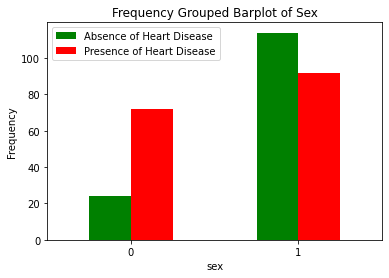

In [15]:
# grouped bar plots (GBP for short) for categorical attributes in relation to target
sexGBP = df.groupby(['sex', 'target'])['sex'].count().unstack('target').fillna(0) # frequency
sexGBP.plot(kind='bar', stacked=False, color=['green', 'red']) # green represents absence, red represents presence
plt.xticks(rotation=0) # x axis labels
plt.title("Frequency Grouped Barplot of Sex") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper left', labels=['Absence of Heart Disease','Presence of Heart Disease']) # legend

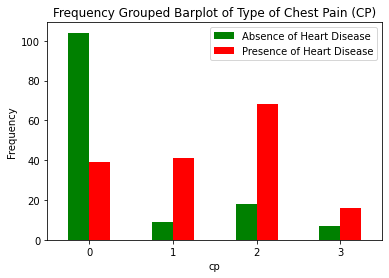

In [16]:
cpGBP = df.groupby(['cp', 'target'])['cp'].count().unstack('target').fillna(0)
cpGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Type of Chest Pain (CP)") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper right', labels=['Absence of Heart Disease','Presence of Heart Disease'])

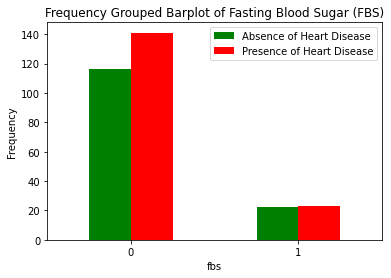

In [17]:
fbsGBP = df.groupby(['fbs', 'target'])['fbs'].count().unstack('target').fillna(0)
fbsGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Fasting Blood Sugar (FBS)") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper right', labels=['Absence of Heart Disease','Presence of Heart Disease'])

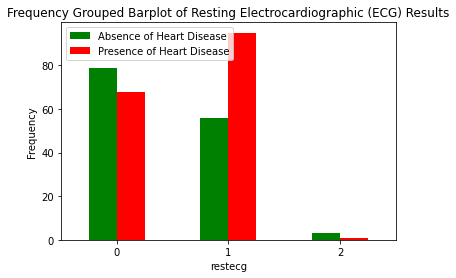

In [18]:
restecgGBP = df.groupby(['restecg', 'target'])['restecg'].count().unstack('target').fillna(0)
restecgGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Resting Electrocardiographic (ECG) Results") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper left', labels=['Absence of Heart Disease','Presence of Heart Disease'])

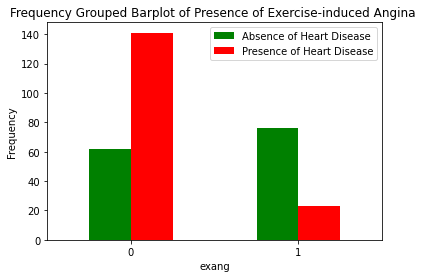

In [19]:
exangGBP = df.groupby(['exang', 'target'])['exang'].count().unstack('target').fillna(0)
exangGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Presence of Exercise-induced Angina ") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper right', labels=['Absence of Heart Disease','Presence of Heart Disease'])

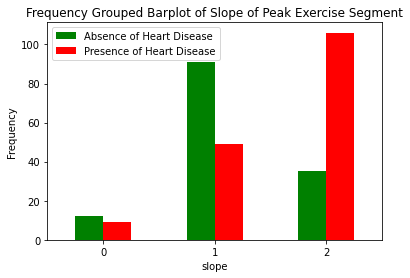

In [20]:
slopeGBP = df.groupby(['slope', 'target'])['slope'].count().unstack('target').fillna(0)
slopeGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Slope of Peak Exercise Segment") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper left', labels=['Absence of Heart Disease','Presence of Heart Disease'])

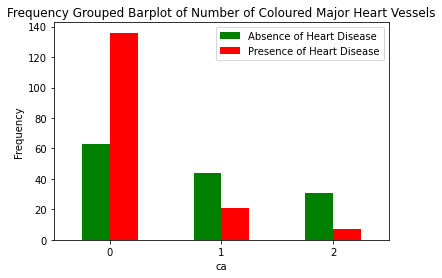

In [21]:
caGBP = df.groupby(['ca', 'target'])['ca'].count().unstack('target').fillna(0)
caGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Number of Coloured Major Heart Vessels") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper right', labels=['Absence of Heart Disease','Presence of Heart Disease'])

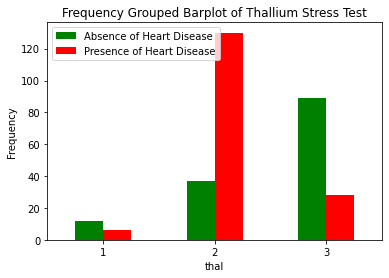

In [22]:
thalGBP = df.groupby(['thal', 'target'])['thal'].count().unstack('target').fillna(0)
thalGBP.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xticks(rotation=0)
plt.title("Frequency Grouped Barplot of Thallium Stress Test") # title of plot
plt.ylabel("Frequency") # y axis label
plt.legend(loc='upper left', labels=['Absence of Heart Disease','Presence of Heart Disease'])

Conclusion : 

Data preprocessing has four main stages – data cleaning, data integration, data transformation, and data reduction. 

Data cleaning will filter and handle dirty data to ensure quality data and quality mining results. In this case, there are noises in terms of duplicated records, impossible categorical values, and outliers. There are no other noises in terms of missing values, as well as no errors in terms of inconsistent data or obvious redundant attributes. 

One duplicated row/record is dropped from the dataset, as this redundancy will cause overfitting of the chosen models.

Winsorisation method is chosen to handle the outliers in numerical attribute values, where outlier values are replaced with the minimum or maximum non-outlier value as identified using the interquartile range (IQR) method. The acceptable value range is [Q1-1.5IQR, Q3+1.5IQR], where Q1 is the first quartile of 25 percentile, Q3 is the third quartile of 75 percentile, and IQR is (Q3 – Q1). This method preserves the distribution information but avoids the harmful effects of outliers. Outliers are identified for the numerical attributes of 'trestbps','chol','thalach', and 'oldpeak', using boxplots where the horizontal x-axis lists all the 13 predictor attributes and the vertical y-axis are their unit measurements.

Similarly for categorical values, the impossible value of 0 in 'thal', as well as the infrequent factor of 3 in 'ca', are identified and replaced or re-levelled with their respective modes. This is the least biased method which preserves the variance and will not create random data, as the aforementioned values are a very small number of less than 5% of the total number of records. In addition to this, re-levelling factors that take up less than 5% of total records will help to ensure that the final model predictions are accurate, since results generated based on too small sample sizes are often not representative of the entire population (Rocchi, 2014). 

The outliers and impossible values are identified as they differ from the mean attribute value by a comparatively large margin.

Finally, the last data cleaning task is to check for missing values, such as through the info() method. No missing values were identified.

Data integration is not needed, since only one dataset is used with no schema integrations, and thus no discernable entity identification issues or data value conflicts.

Data transformation will check overall range of values for the entire dataset, such as using the describe() method. It is found that all values fall under the large range of [0, 370.375], so data transformation is needed to scale the values into an appropriate and comparable range for easy visualisations and modelling. Min-max normalisation is chosen to scale the values to a smaller range of [0, 1] to reduce their differences and facilitate compatible comparisons. The attributes involved are 'age', trestbps', 'chol', and 'thalach'. This step is mostly of use during the chosen data modelling techqniue of KNN, in order to ensure that all values are similarly scaled and centered for the required distance computations.

Data reduction mainly involves attribute dimensionality reduction of redundant derivable attribute. A correlation matrix lists all the correlation coefficients in order to identify multicollinearity, which are the high intercorrelations above an absolute value of 0.5 between the predictors. For such a pair of predictors, one of them will be dropped since it would be redudant to include both of them and cause model overfitting.

The correlations will compare and describe the linear connection and relationship between pairs of predictors, through the type of correlation and its strength. A positive correlation indicates that both attribute' values will change in the same direction, while a negative correlation indicates that both attribute' values will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship between that pair of predictors. 

However, Decision Tree, KNN, and Naive Bayes models are chosen as the more appropriate classification models, and they are all immune to multicollinearity. The first two are non-parametric models - Decision Tree only examines one of the attribute at a time during the splitting process, while KNN examines attributes all at once. Naïve Bayes assumes all attributes are conditionally independent. Due to these justified reasons, the only predictors that are considered to be dropped will be if their intercorrelations are above 0.95 and thus almost perfect descriptions of each other. In other words, it would be redundant to include both of them. Therefore, no attributes were removed so as to not lose relevant information and degrade the overall prediction model. 

For numerical data, pairs plot or scatterplot matrix are used to identify and remove attributes with weak class-attribute relationship, since this is of most use and interest for classification purposes. The scatter plots on the upper triangle will visualize the relationships between two attributes. Kernel density estimate (KDE) plots, which will be discussed in further detail in the next assignment section, will illustrate the univariate distribution of a single attribute in relation to the target attribute in terms of a line graph. 2-D kernel density plots on the lower triangle will illustrate the density of single attribute in relation to the target attribute. All of them were analysed, and it was found that all attributes have acceptable class-attribute relationship with relatively distinguishable class boundaries as well as acceptable degrees of overlapping or overplotting areas. 

Similarly for categorical data, frequency grouped barplots are used, where the x-axis list the possible categories and the y-axis is the discrete value of the frequency of occurences. The comparisons are based on the height differences of the different coloured columns where red represents the presence of heart disease and green represents its absence. The columns themselves represent the proportions of target class within the main attribute. In the end, it was also found that all attributes have acceptable class-attribute relationship with relatively distinguishable class boundaries. Some examples of findings include three times as significant risk of heart disease for females, and slightly less risk for males by 20%. Another example is that fasting blood sugar of more than 120 mg/dl does not affect the risk of heart disease, whereas lower than that level will result in slightly increased likelihood of heart disease by 15%.

Therefore, no attributes were removed as they are all able to allow relatively accurate predictions for classification purposes.

### Exploratory Data Analysis (EDA) and Data Visualisations

In [23]:
# start exploratory data analysis (EDA) to summarise main characteristics

# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

# output :
# 1 target object class
# 10 columns/attributes of discrete numerical data type with 64 digit placings
# 3 columns/attributes of continuous numerical data type with 64 digit placings
# 302 rows/records with no missing values
# memory space usage is 33.2kb

# labeled data will use supervised learning techniques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [24]:
# dimension of dataset
df.shape

(302, 14)

In [25]:
# list and count the class names and their frequency
from collections import Counter
count = Counter(df['target'])
print(count.items())

dict_items([(1, 164), (0, 138)])


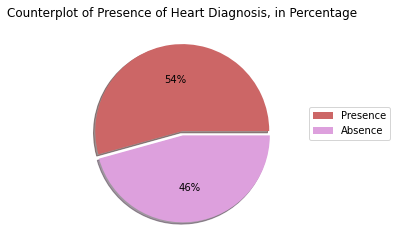

In [26]:
# visualise the count of the target class
fig, ax = plt.subplots()
count = df['target'].value_counts()
ax.pie(count, colors = ['#CC6666', '#DDA0DD'], autopct='%1.f%%', explode=(0, 0.05), shadow=True)

# display legend
fig.legend(loc='center right', labels=['Presence', 'Absence'], fontsize='medium')

# title of pie chart
ax.set_title('Counterplot of Presence of Heart Diagnosis, in Percentage')

# plot the graph
plt.show()

# slight class imbalance

In [27]:
tblTarget = df['target'].value_counts().to_frame().reset_index()
tblTarget.columns = ['Value', 'Frequency']
tblTarget

,Value,Frequency
0,1,164
1,0,138


In [28]:
# frequency tables
tblAge = df['age'].value_counts().to_frame().reset_index() # count frequency
tblAge.columns = ['Value', 'Frequency'] # specify column header titles
tblAge

,Value,Frequency
0,58,19
1,57,17
2,54,16
3,59,14
4,52,13
5,51,12
6,62,11
7,44,11
8,60,11
9,56,11


In [29]:
tblSex = df['sex'].value_counts().to_frame().reset_index()
tblSex.columns = ['Value', 'Frequency']
tblSex

,Value,Frequency
0,1,206
1,0,96


In [30]:
tblCP = df['cp'].value_counts().to_frame().reset_index()
tblCP.columns = ['Value', 'Frequency']
tblCP

,Value,Frequency
0,0,143
1,2,86
2,1,50
3,3,23


In [31]:
tblTrestbps = df['trestbps'].value_counts().to_frame().reset_index()
tblTrestbps.columns = ['Value', 'Frequency']
tblTrestbps

,Value,Frequency
0,120,37
1,130,36
2,140,32
3,110,19
4,150,17
5,170,13
6,128,12
7,138,12
8,125,11
9,160,11


In [32]:
tblChol = df['chol'].value_counts().to_frame().reset_index()
tblChol.columns = ['Value', 'Frequency']
tblChol

,Value,Frequency
0,197.0,6
1,204.0,6
2,234.0,6
3,269.0,5
4,254.0,5
...,...,...
143,172.0,1
144,185.0,1
145,326.0,1
146,164.0,1


In [33]:
tblFbs = df['fbs'].value_counts().to_frame().reset_index()
tblFbs.columns = ['Value', 'Frequency']
tblFbs

,Value,Frequency
0,0,257
1,1,45


In [34]:
tblRestecg = df['restecg'].value_counts().to_frame().reset_index()
tblRestecg.columns = ['Value', 'Frequency']
tblRestecg

,Value,Frequency
0,1,151
1,0,147
2,2,4


In [35]:
tblThalach = df['thalach'].value_counts().to_frame().reset_index()
tblThalach.columns = ['Value', 'Frequency']
tblThalach

,Value,Frequency
0,162.000,11
1,163.000,9
2,160.000,9
3,152.000,8
4,150.000,7
...,...,...
86,129.000,1
87,184.000,1
88,185.000,1
89,190.000,1


In [36]:
tblExang = df['exang'].value_counts().to_frame().reset_index()
tblExang.columns = ['Value', 'Frequency']
tblExang

,Value,Frequency
0,0,203
1,1,99


In [37]:
tblOldpeak = df['oldpeak'].value_counts().to_frame().reset_index()
tblOldpeak.columns = ['Value', 'Frequency']
tblOldpeak

,Value,Frequency
0,0.0,98
1,1.2,17
2,0.6,14
3,1.0,14
4,0.8,13
5,1.4,13
6,0.2,12
7,1.6,11
8,1.8,10
9,0.4,9


In [38]:
tblSlope = df['slope'].value_counts().to_frame().reset_index()
tblSlope.columns = ['Value', 'Frequency']
tblSlope

,Value,Frequency
0,2,141
1,1,140
2,0,21


In [39]:
tblCA = df['ca'].value_counts().to_frame().reset_index()
tblCA.columns = ['Value', 'Frequency']
tblCA

,Value,Frequency
0,0,199
1,1,65
2,2,38


In [40]:
tblThal = df['thal'].value_counts().to_frame().reset_index()
tblThal.columns = ['Value', 'Frequency']
tblThal

,Value,Frequency
0,2,167
1,3,117
2,1,18


In [41]:
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.466887,2.327815,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,0.708676,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [42]:
# find modes
for i in ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'):
    mode_data = statistics.mode(df[i])
    print(i, ":", mode_data)

age : 58
sex : 1
cp : 0
trestbps : 120
chol : 204.0
fbs : 0
restecg : 1
thalach : 162.0
exang : 0
oldpeak : 0.0
slope : 2
ca : 0
thal : 2


In [43]:
# find variance
for i in ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'):
    var_data = round(statistics.variance(df[i]), 4)
    print(i, ":", var_data)

age : 81.8658
sex : 0.2176
cp : 1.0651
trestbps : 275.7337
chol : 2254.9851
fbs : 0.1272
restecg : 0.2767
thalach : 518.29
exang : 0.2211
oldpeak : 1.233
slope : 0.3798
ca : 0.5022
thal : 0.3407


In [44]:
# find coefficient of variation (CV)
from scipy.stats import variation
for i in ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'):
    cv_data = round(variation(df[i], axis = 0), 4)
    print(i, ":", cv_data)

# CV < 1 : data points are centered, with acceptable dispersion and variability relative to the 
    # mean (Kaufmann, 2014) -- age, sex, trestbps, chol, restecg, thalach, slope, thal
# CV from 1 to 10 : data points are relatively centered, with low dispersion and variability relative to the 
    # mean (Kaufmann, 2014) -- cp, fbs, exang, oldpeak, ca

age : 0.166
sex : 0.6827
cp : 1.0693
trestbps : 0.1263
chol : 0.1932
fbs : 2.3898
restecg : 0.9975
thalach : 0.1519
exang : 1.432
oldpeak : 1.0786
slope : 0.4403
ca : 1.5154
thal : 0.2503


In [45]:
# find skewness
from scipy.stats import skew
for i in ('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'):
    skew_data = round(skew(df[i]), 4)
    print(i, ":", skew_data)

# skew = 0 : normally distributed and symmetric
# skew < 0 : means more weight in the distribution's right tail -- age, sex, thalach, slope, thal
# skew > 0 : means more weight in the distribution's left tail -- cp, trestbps, chol, fbs, restecg, exang, oldpeak, ca

# skew < -1 or skew > 1 : highly skewed -- fbs, ca
# -1 < skew < -0.5 or 0.5 < skew < 1 : moderately skewed -- sex, exang, oldpeak, slope
# -0.5 < skew < 0.5 : approximately symmetric -- age, cp, trestbps, chol, restecg, thalach, thal

# highly skewed and kurtosis will indicate heavy-tailed relative to a normal distribution 
    # with many extreme values (see KDE plots below)

age : -0.2027
sex : -0.7822
cp : 0.4906
trestbps : 0.3879
chol : 0.334
fbs : 1.9713
restecg : 0.1686
thalach : -0.4877
exang : 0.7336
oldpeak : 0.989
slope : -0.5007
ca : 1.183
thal : -0.209


Conclusion : 

Exploratory data analysis (EDA) is helpful in performing initial investigations on data before formal modeling and graphical representations, in order to discover patterns, look over assumptions, and test hypothesis.

The Heart Disease dataset dimension is 302 records for 13 predictors or independent or explanatory attributes, and an attribute for target class label. This shows that the dataset contains labelled data. 

For discrete quantitative integer data type, the attribute 'age' is the age of patient in years. 'trestbps' is the resting blood pressure in mm Hg upon hospital admission.

For discrete quantitative asymmetric binary data type, 'sex' is the gender of the patient where 1 represents male and 0 represents female. For symmetric binary data type, 'fbs' is the fasting blood sugar where 1 represents more than 120 mg/dl and 0 represents less than that. 'exang' is the presence of exercise-induced angina where 1 represents presence and 0 represents absence.

For quantitative categorical data type, 'cp' is the type of chest pain where 0 represents typical angina, 1 represents atypical angina, 2 represents non-angina pain, and 3 represents asymptomatic. 'restecg' is the resting electrocardiographic results where 0 represents normal, 1 represents abnormalities, and 2 represents probable or definite left ventricular hypertrophy. 'slope' represents the slope of peak exercise segment where 0 represents upsloping, 1 represents flat, and 2 represents downsloping. 'ca' is the number of major heart vessels coloured by flourosopy. 'thal' of 1 represents normal, 2 represents fixed defect, and 3 represents reversable defect.  

For quantitative continuous float data type, 'oldpeak' is the depression induced by exercise relative to rest, and it is limited to one decimal place. 'chol' is the serum cholesterol in mg/dl. 'thalach' is the maximum heart rate achieved in BPM.

The dataset has 2 classes of presence of heart disease. The data type is quantitative asymmetric discrete binary values where 1 represents presence and 0 represents absence. The counterplot pie chart clearly illustrates that data available for the target class of 0 as absence has slightly less proportion than that for the other class of 1 as presence, and this slight class imbalance will be taken note of for further data visualisations and analysis later on (Jaitley, 2019). Since the data is labeled, supervised machine learning methods will be used to model the data.

The frequency distribution tables list the frequency of occurences of each attribute value. In other words, this visualises the frequency distribution and identifies preliminary patterns in data, especially the mode value. describe() is then used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics (Laerd statistics, n.d.). 

The coefficient of variance (CV) is the relative standard deviation, in other words the standardised measure of dispersion of a frequency distribution. The CV of 'age', 'sex', 'trestbps', 'chol', 'restecg', 'thalach', 'slope', and 'thal' are all less than 1, which indicates that all their data points are centered, with acceptable dispersion and variability relative to their means (Kaufmann, 2014). The remaining attributes of 'cp', 'fbs', 'exang', 'oldpeak', and 'ca' have CV of around 1 to 3, which indicates that their data points are relatively centered, with low dispersion and variability relative to the mean (Kaufmann, 2014).

In addition to that, the skewness and kurtosis is helpful in describing the data distribution. 'age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', and 'thal' have skew values between -0.5 and 0.5, so their data is approximately normally distributed due to a slight asymmetry. 'sex', 'exang', 'oldpeak', and 'slope' are moderately skewed with skew values between the absolute values of 0.5 and 1. 'fbs' and 'ca' are highly skewed with skew values above the absolute value of 1. In addition to the skewness of data distribution, the weight in the distribution's left or right tail can also be identified by the negative and positive skew value respectively. 'age', 'sex', 'thalach', 'slope', and 'thal' have more weight in the distribution's right tail, while the other eight remaining predictors' data distributions have more weight in the distribution's left tail. Highly skewed and kurtosis will indicate a heavy-tailed distribution relative to a normal distribution, with many extreme values. 

For instance, the attribute 'age' has a mean of 54.42, median of 55,5, and mode of 58 are relatively unequal, and in addition to its CV of 0.166 and skew value of -0.2027, it is suggested to have a slightly asymmetric and light left-tailed data distribution.

The kernel density estimate (KDE) plots, as visualised below, are additionally used to provide a more complete picture of these conclusions. 

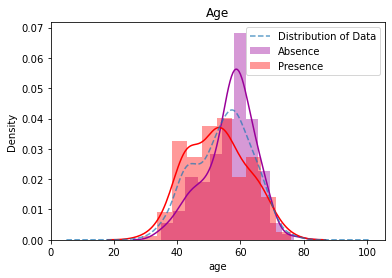

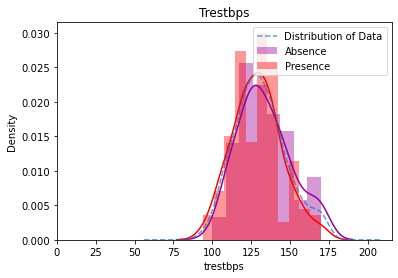

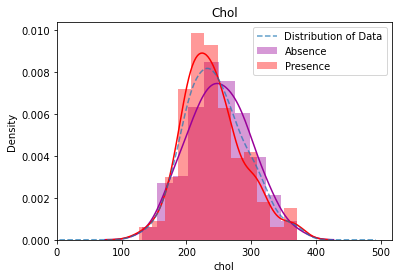

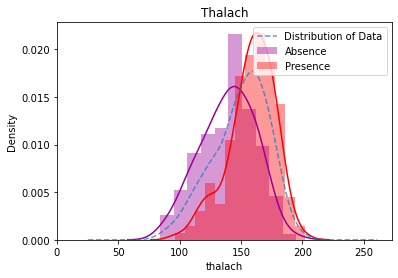

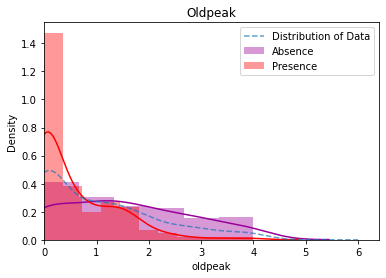

In [46]:
# for numerical attributes, density plotting to visualise data frequency for overall data distribution 
    # in relation to the target attribute
from seaborn import distplot

# attributes for density plotting
for i in ('age','trestbps','chol','thalach','oldpeak'):
    plt.figure()
    
    # compare distribution of two target classes by using different RGB hex codes to 
        # differentiate the target classes by colour
    distplot(df[i][df['target']==0], color='#990099')
    distplot(df[i][df['target']==1], color='#FF0000')
    
    # plot distribution of data, set graph title, and specify a dashed line style and transparency
    df[i].plot.kde(title=i.title(), linestyle='dashed', alpha=0.7)
    
    # display legend by passing location argument (to top right corner) and a list of legend texts
    plt.legend(loc='upper right', labels=['Distribution of Data','Absence','Presence'])
    
    # set x axis limit, impossible to have negative values
    plt.xlim(0, )

    plt.show()
    
# ranking of correlation to target in decreasing order : 
    # thalach, oldpeak, chol, age, trestbps

# approximate normal data distribution for trestbps, chol, and thalach, since approximately
    # symmetric, unimodal, asymptotic, and the mean, median, and mode are similar
# slightly larger chol in mg/dl are predicted to not have heart disease
    # chol for absence of heart disease has mean of 250mm/dl, while that of presence has mean of 225mm/dl
# larger thalach in BPM and slightly larger trestbps in mm Hg are predicted to have heart disease
    # thalach for presence of heart disease has mean of 170 BPPM, while that of absence has mean of 148 BPM
    # trestbps for presence of heart disease has mean of 130 mm Hg, while that of absence has mean of 128 mm Hg
    
# bimodal or multimodel data distribution for age and oldpeak, since there are two 
    # distinct peaks (local maxima)
# older in age and larger oldpeak are predicted to not have heart disease. 
    # age for absence of heart disease has mean of 59, while that of presence has mean of 55
    # oldpeak for absence of heart disease has mean of 1.3, while that of presence has mean of 0



# all categorical attributes of 'sex','cp','fbs','restecg','exang','slope','ca', and'thal' have 
    # categorical or generalised Bernoulli or multinoulli distribution, as shown in the 
        # frequency grouped barplots in the Data Preprocessing section

Conclusion : 

The data is labelled, where the presence of absence of heart disease is the target attribute. Since the data has already been cleaned, and methods such as outlier removal has occured in step 3 in Section 3, data analysis will be mostly focused on the relationship between the various health-related features and the target attribute. This is because the classification purpose will be mostly interested in these types of correlation and their strengths to ensure accurate predictions. 

matplotlib.pyplot graphics library is imported for the visualisations of figures. It is convenient as it has good reproducibility of scientific figures, for example when regenerating a figure using updated data, appearance, latex labels and texts, and aspects such as orientation. %matplotlib inline is used to configure the output of the figures to be embedded in the Jupyter notebook file, instead of opening a new window each time.

Data visualisation will include suitable graphs that are descriptive and comparative to effectively communicate both abstract and concrete ideas. Histogram density plots are chosen to illustrate the overall data distribution, as well as the data distributions of presence of heart disease based on the predictor attributes. Seaborn is used for a terser Application Programming Interface (API). 

For continuous numerical data, kernel density estimate (KDE) plots, using the kde() method, will visualise the overall distribution through a continuous probability density curve. The distplot() method generates two histogram density plots and their continuous probability density curves for the two target attribute values in the same figure space, and clearly differentiates them by specifying different RGB hex colour codes in its parameters. The xlim() method restricts the x-axis plot range of attribute values to 0 and above for meaningful visualisations, since it is impossible for all the predictor attributes to have a negative value. The y-axis is the density measurements.

All the overall KDE distribution curves have low to negligible kurtosis and skewness, partly becuase the data instances available for each of the two classes are approximately the same. 

'age' and 'oldpeak' have bimodal or multimodel data distribution that are slightly asymmetric, since there are two distinct peaks or also known as local maxima. 'trestbps', 'chol', and 'thalach' have approximate normal data distribution as the curves are approximately symmetric, unimodal, asymptotic, and their mean, median, and mode are similar (Lane, n.d.). According to the respective data distributions, the distribution models can be used as a prediction model to calculate the probabilities (McNeese, 2016). The specific information on data patterns and behaviors helps in selecting appropriate choices of statistical tests (McNeese, 2016). This allows the analysis capability to extend beyond the limitation of descriptively graphing raw sample data, and towards formulating population inferences and constructing advanced machine learning models.

The histogram density plots and their respective highest point in the curves show the patterns and trends in the numerical data. Specifically, the 'chol' for absence of heart disease has mean of 250mm/dl, while that of presence has mean of 225mm/dl. It is thus found that patients with slightly larger 'chol' in mg/dl are predicted to not have heart disease. 

The 'thalach' for presence of heart disease has mean of 170 BPM, while that of absence has mean of 148 BPM. The 'trestbps' for presence of heart disease has mean of 130 mm Hg, while that of absence has mean of 128 mm Hg. Patients with larger 'thalach' in BPM and slightly 'trestbps' in mm Hg are thus predicted to have heart disease, 

The 'age' for absence of heart disease has mean of 59, while that of presence has mean of 55. The 'oldpeak' for absence of heart disease has mean of 1.3, while that of presence has mean of 0. Patients older in 'age' and larger 'oldpeak' are thus predicted to not have heart disease. 

The difference in the overlapping or overplotting histogram density plots clearly show that the target class of strongly correlated attributes can be predicted more easily, and more useful meaning can be extracted. Its data points are less scattered and thus have less overlapping or overplotting areas, which means that they better follow their respective common relationship or pattern. It can thus be seen that the ranking of correlation to the target, in decreasing order, is 'thalach', 'oldpeak', 'chol', 'age', and 'trestbps'. 'thalach', which is the maximum heart rate achieved in beats per minute (BPM), is thus the best numerical predictor of the presence of heart disease in this case.

For discrete categorical data, frequency grouped barplots are used to compare each category in relation to the target, as illustrated and discussed under the Data Preprocessing section. All categorical attributes of 'sex','cp','fbs','restecg','exang','slope','ca', and 'thal' thus have a categorical or generalised Bernoulli or multinoulli distribution. The possible values that the attribute can take on are listed as categories in the x-axis, while the y-axis can be used to specify the frequency and the likelihood of each category. Some examples of findings include three times as significant risk of heart disease for females, and slightly less risk for males by 20%. Another example is that fasting blood sugar of more than 120 mg/dl does not affect the risk of heart disease, whereas lower than that level will result in slightly increased likelihood of heart disease by 15%.

### Predictive Modelling

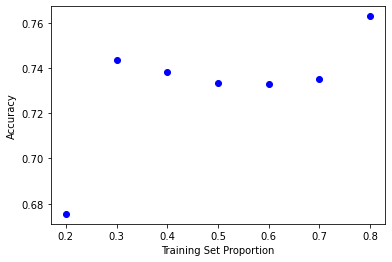

In [47]:
# classify and model the data using k-Nearest Neighbour (KNN), Decision Tree (DT), and Naive Bayes (NB)
    # machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import math

# split dataset into attributes and labels
X = df.iloc[:, :-1].values # the attributes
y = df.iloc[:, 13].values # the labels

# choose appropriate range of training set proportions
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# plot decision tree based on information gain and twenty best rules
DT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)

# use Gaussian method to support continuous data values
NB = GaussianNB()

# choose recommended optimal number of clusters of sqrt(number of records)
KNN = KNeighborsClassifier(n_neighbors = math.ceil(math.sqrt(302)))

# find best training set proportion for the chosen models
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s, random_state=1001)
        DT.fit(X_train, y_train) # consider DT scores
        scores.append(DT.score(X_test, y_test))
        NB.fit(X_train, y_train) # consider NB scores
        scores.append(NB.score(X_test, y_test))
        KNN.fit(X_train, y_train) # consider KNN scores
        scores.append(KNN.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training Set Proportion') # x axis label
plt.ylabel('Accuracy'); # y axis label

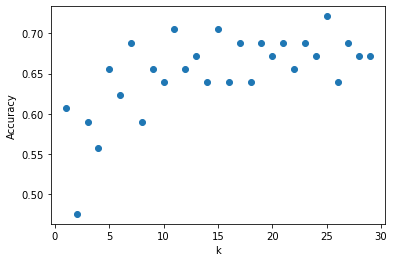

In [48]:
# choose train test splits from original dataset as 80% train data and 20% test data for highest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1001)

# find optimal k number of clusters
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k') # x axis label
plt.ylabel('Accuracy') # y axis label
plt.scatter(k_range, scores) # scatter plot
plt.xticks([0,5,10,15,20,25,30]);

In [49]:
# using k-Nearest Neighbour (KNN) classifier
# choose 25 as the optimal number of clusters
classifierKNN = KNeighborsClassifier(n_neighbors=25)
classifierKNN.fit(X_train, y_train)

# using Euclidean distance metric
classifierKNN.effective_metric_

'euclidean'

In [50]:
# using Naive Bayes (NB) classifier
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

# show prior probability of each class
classifierNB.class_prior_

array([0.47717842, 0.52282158])

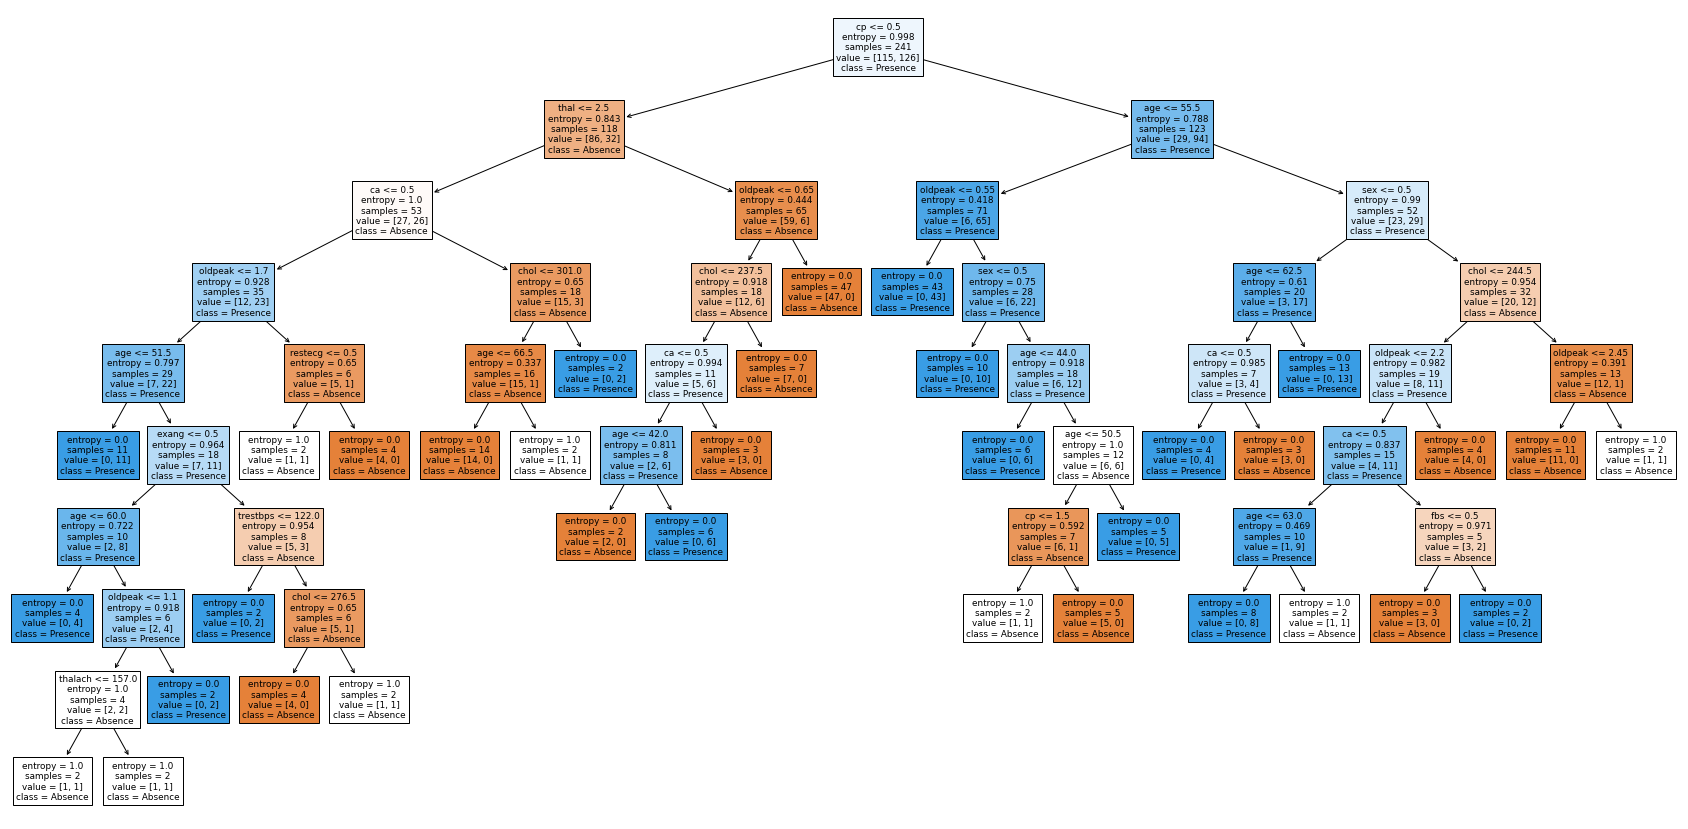

In [51]:
# using Decision Tree (DT) classifier
# cnstructed based on information gain and twenty best rules
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', 
                                      min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

# plot decision tree
from sklearn import tree
fig = plt.figure(figsize=(30,15))
fn = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
DT = tree.plot_tree(classifierDT,
                    feature_names=fn,  
                    class_names=["Absence", "Presence"],
                    filled=True)
            
# outputs 34 extracted rules

In [52]:
# identifies the important features
classifierDT.feature_importances_

# according to DT, 'age' is the most important attribute out of the 13 attributes

array([0.23812491, 0.05885094, 0.20642046, 0.01662827, 0.09169314,
       0.02161148, 0.00845866, 0.        , 0.01112309, 0.16543347,
       0.        , 0.10313567, 0.0785199 ])

In [53]:
# number of records in training set
len(X_train)

241

In [54]:
# count of each target in training set
count = Counter(y_train)
print(count.items())

dict_items([(0, 115), (1, 126)])


Conclusion : 

The data is labelled, where the presence of absence of heart disease is the target attribute. Feature extraction or transformation and feature selection has already occured in step 3 in Section 3. Through exploratory data analysis, the supervised machine Learning algorithms of KNN, decision tree, and Naïve Bayes, are chosen to fit to the dataset.

The dataset is split into two separate sets - the training set and test set. They both consist of the same attributes, but not the same attribute values. The training set is used to construct the classification models. The test set is used to predict the classifications of the “new” unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall, and F1-score of those classifications. 

The target labels have a slight class imbalance, where 1 representing presence has 126 instances, and 0 representing absence has 115. In order to ensure that the training and test sets are unbiased and representative of the three classes, the list of random numbers starting from the random selected position of 1001 is used to perform random splitting. An accuracy graph is plotted to find the most accurate training set proportion, after taking the chosen Decision Tree, Naive Bayes, and KNN model scores into consideration. According to the graph, the training subset should take up 80% of the dataset which is 241 instances, whereas the test subset will take up 20% which is 61 instances.

For the KNN model, the optimal value of k number of nearest neighbours is found by plotting an accuracy graph, which identifies the optimal value of k as 25 in order to obtain the highest accuracy possible of 73%. This is done to obtain a k value that is large enough to minimise error rate and sensitivity to noise, but not too large such that the boundaries are over-smoothed or overfitted with points from the other classes. The chosen k value is also appropriate since 25 is not a multiple of the 2 classes, which is a requirement when selecting k value. The KNN model parameters are thus the value of k of 25, and Euclidean distance metric to compute the distance between data points. The output is the assigned class membership based on the majority vote on the data point’s k number of neighbors.

Gaussian Naïve Bayes is suitable for taking into account of the continuous numerical data types, but is not preferred since it assumes independent Gaussian data distribution that approximates normal distribution where some of the actual data have slightly asymmetric bimodal or multimodal distributions. The prior probabilities and likelihoods are computed in order to predict the posterior probability of a data point belonging to each of the two classes. The outputs are the aforementioned posterior probabilities, and the assigned class membership is selected as the class with the highest posterior probability.

Decision tree is constructed based on parameters of best split strategy, and the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The outputs are the classification rules. These are determined by the flow sequence from the root node and the corresponding branches to the internal or decision nodes, then stopping when the leaf node representing the class label is reached. A total of 34 rules were extracted from the decision tree. According to this model, 'age' is the most important attribute out of the 13 attributes, with the highest importance score based on the least reduction in the entropy criterion that was chosen to select the split points.

### Evaluation of Model Performance

In [55]:
# number of records in test set
len(X_test)

61

In [56]:
# use the chosen three models to make predictions on test data
y_predKNN = classifierKNN.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predNB = classifierDT.predict(X_test)

In [57]:
# for k-Nearest Neighbours model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

# using accuracy performance metric
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predKNN))

[[18  5]
 [12 26]]
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        23
           1       0.84      0.68      0.75        38

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.75      0.72      0.73        61

Accuracy: 0.7213114754098361


In [58]:
# for Naive Bayes model
# using confusion matrix
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# using accuracy performance metric
print("Accuracy:", metrics.accuracy_score(y_test, y_predNB))

[[20  3]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

Accuracy: 0.8360655737704918


In [59]:
# for Decision Tree model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Accuracy:", metrics.accuracy_score(y_test, y_predDT))

[[20  3]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

Accuracy: 0.8360655737704918


Conclusion : 

The model performance is evaluated by using the test set of 61 records to predict the classifications of these “new” unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 23 instances for 0 as absence, and 38 for 1 as presence of heart disease.

False negative (FN) and false positive (FP) are both the worst error, as the implications of a wrong classification for a false negative for a patient misdiagnosed as not having heart disease is that the patient to lose out on immediate treatment and medications and may lead to death if the mistake is discovered too late. On the other hand, a false positive for a patient misdiagnosed as having heart disease, will cause the patient to be subjected to unneeded treatments and medications which may lead to other health problems.

Both the decision tree model and the Naive Bayes model have the best performance metrics of 83.61% for accuracy, 84% for precision and recall, and F1-score of 83.5%. The KNN model has an accuracy of 72.13%, precision of 73.5%, and 72.5% for both recall and F1-score. For all three chosen models, the better classifications is 1 representing presence, while 0 representing absence of heart disease has the worst predictions. In other words, the wrong classifications of FN predictions are slightly more common.

Accuracy indicates the overall proportion of correct predictions for the two classes. 

Recall indicates the proportion of correct predictions for each individual class, out of the corresponding actual class. In other words, the proportion of all actual classes that were predicted correctly. 

Precision indicates the proportion of correct predictions for each individual class, out of the corresponding predicted class. In other words, the proportion of all predicted classes were actually predicted correctly.

F1-score, also known as F-score or F-measure, is used to make precision and recall comparable through their harmonic mean, in cases where they are both important. This allows it to consider both metrics and punish extreme values more heavily. F-score is more useful for biased datasets that are common in real-life scenarios. This occurs when the counts of FP and FN are very different, but they must still be properly considered since they are both crucial conditions in the prediction. Therefore, F-score will compute the overall quality of translations produced by the chosen machine learning engine.

In conclusion, both the Naive Bayes model, as well as the decision tree model using parameters of best split strategy and the criterion of entropy, can be chosen as the final model for the prediction of presence of heart disease in patients. Both their FN values are 7, while their FP values are 3. The decision tree model is preferred since the Gaussian Naive Bayes model assumes independent Gaussian data distribution that approximates normal distribution where some of the actual data have slightly asymmetric bimodal or multimodal distributions. 

There may be possible improvements in current model parameters. One example relating to the decision tree model is to adjust the maximal depth as one of the stopping criteria, increase the confidence level for the pessimistic error computations for pruning, and increase the minimal gain before the nodes are split. These will help to prevent model performance from falling below a specified minimum threshold.

### Interpretation of Results

In [60]:
# new data for 13 predictor attributes
newdata = [[60, 2, 3, 150, 250, 0, 1, 150, 0, 2, 1, 0, 1]]

# compute probabilities of assigning to each of the two target classes
probaDT = classifierDT.predict_proba(newdata)
probaDT.round(4) # round probabilities to four decimal places, if applicable

# certainty of 100% probability of absence of heart disease

array([[1., 0.]])

In [61]:
# make prediction of class label
predDT = classifierDT.predict(newdata)
predDT

# prediction is absence of heart disease

array([0], dtype=int64)

Conclusion : 

The findings from this assignment project is that the ranking of correlation of numerical attributes to the target attribute is, in decreasing order, 'thalach', 'oldpeak', 'chol', 'age', and 'trestbps'. The interpretation is that 'thalach', which is the maximum heart rate achieved in beats per minute (BPM), is the best numerical predictor of the presence of heart disease, out of the 5 numerical predictors.

Other findings include the patterns and trends in the numerical data. Through the comparisons of means in the kernel density plots (KDEs), it is found that patients with slightly larger 'chol' in mg/dl,  older in 'age', and larger 'oldpeak', are predicted to not have heart disease. Patients with larger 'thalach' in BPM and slightly larger 'trestbps' in mm Hg are predicted to have heart disease. As for categorical data, some examples of findings include three times as significant risk of heart disease for females, and slightly less risk for males by 20%. Another example is that fasting blood sugar of more than 120 mg/dl does not affect the risk of heart disease, whereas lower than that level will result in slightly increased likelihood of heart disease by 15%.

In conclusion, both the Naive Bayes model, as well as the decision tree model using parameters of best split strategy and the criterion of entropy, can be chosen as the final model to predict the presence of heart disease, since they have the shared best performance metrics of four metrics of accuracy, precision, recall, and F1-score. This strong prediction power was evaluated using the confusion matrix in relation to the testing set, in order to effectively test the model's ability to generalise unseen future data. On the other hand, the decision tree model parameters were found to be most accurate after choosing the parameter value that is able to provide the highest predictive accuracy. 

The decision tree model is preferred since the Gaussian Naive Bayes model assumes independent Gaussian data distribution that approximates normal distribution where some of the actual data have slightly asymmetric bimodal or multimodal distributions. This model are now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of patients based on their respective characteristics and features of the 13 predictors of health-related data. These new data instances will be passed to the chosen model classifier to predict its class label. A similar example is demonstrated above. The predicted class for the specified example is assigned as 0 representing absence of heart disease, as its probability has a predicted certainty of 100% and is thus higher than the 0% likelihood of predicted class of 1 representing presence. It is also safe to intepret this result as having 83.61% for accuracy, 84% for precision and recall, and F1-score of 83.5%, based on the model's performance metrics.

The objective of this assignment project has been achieved. 

Possible suggestions of future research directions is to implement possible improvements in current model parameters, as described in the previous section regarding Model Evaluations. Another improvement is to implement more sophisticated classification models such as Random Forest Classifier and Logistic Regression, since larger numbers of predictors can often be better handled using more complex modelling techniques. In particular, the random forest classifier will handle larger number of input variables by combining multiple base models of decision trees during its training period. It uses the strategy of ensemble machine learning methods to construct a single optimal predictive model. In this case, the output may be the mode class or the mean prediction of individual trees. These aforementioned improvements can be performed in hopes of obtaining even more accurate and precise predictions.

References for this assignment project : 

Frost, J. (2018, October 17). _Difference between Descriptive and Inferential Statistics._ Statistics By Jim. https://statisticsbyjim.com/basics/descriptive-inferential-statistics/

Jaitley, U. (2019, February 2). _Comparing Different Classification Machine Learning Models for an imbalanced dataset._ Towards Data Science. https://towardsdatascience.com/comparing-different-classification-machine-learning-models-for-an-imbalanced-dataset-fdae1af3677f

Kaufmann, J. (2014, September 26). _What do you consider a good standard deviation?._ ResearchGate.
https://www.researchgate.net/post/What-do-you-consider-a-good-standard-deviation

Laerd statistics. n.d. _Descriptive and Inferential Statistics._ Laerd statistics. https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php

Lane, D. n.d. _Introduction to Normal Distributions._ OnlineStatBook. http://onlinestatbook.com/2/normal_distribution/intro.html

McNeese, B. (2016, September 1). _Distribution Fitting._ BPI Consulting. https://www.spcforexcel.com/knowledge/basic-statistics/distribution-fitting#:~:text=Not%20all%20parameters%20exist%20for%20each%20distribution.%20For,estimating%20the%20parameters%20that%20define%20the%20various%20distributions

Rocchi, M. (2014). _Tutorial: Data Cleaning._ https://youtu.be/2ZMXjDVIdd8> 

WHO. (2020). _Cardiovascular Diseases._ World Health Organisation. https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1

# Thank you